In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LeakyReLU
from keras import optimizers
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.externals import joblib

Using TensorFlow backend.
C:\Users\owenl\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
X1 = np.genfromtxt('x_train.csv', delimiter=',')
Y1 = np.genfromtxt('y_train.csv', delimiter=',')
#X2 = np.genfromtxt('x_val_scale.csv', delimiter=',')
#Y2 = np.genfromtxt('y_val_scale.csv', delimiter=',')

In [24]:
X1.shape

(50000, 6)

In [26]:
Y1.shape

(50000,)

In [37]:
# generate the train & test data
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=40)

batch_size = 128
epochs = 10000
model = Sequential()
model.add(Dense(16, input_shape=(6,)))
model.add(Activation('relu'))

#model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(4))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('relu'))
model.summary()

#model.compile(loss='mse',
#              optimizer=Adam(0.01,0.9,0.999,False))

#sgd = optimizers.SGD(lr=0.001, momentum=0.0, nesterov=False)
RMSprop=optimizers.RMSprop(lr=0.00001)
model.compile(loss='mse', optimizer=RMSprop, metrics=['mape'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score1 = model.evaluate(x_test, y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                112       
_________________________________________________________________
activation_21 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
activation_22 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 36        
_________________________________________________________________
activation_23 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 5         
__________

In [38]:
Ypp=model.predict(X1)

In [39]:
Yp

array([[25.25199 ],
       [25.467463],
       [12.259393],
       ...,
       [26.062628],
       [12.757436],
       [25.573347]], dtype=float32)

In [40]:
model_json = model.to_json()
with open("model_mse_6D_random.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_mse_6D_random.h5")

array([24.814, 20.587, 12.298, ..., 26.132, 13.236, 25.257])

In [46]:
X = np.genfromtxt('inviscid_sampling_hq07_U13_AoA10.csv', delimiter=',', skip_header=1)
Y = np.genfromtxt('RANS_sampling_hq07_U13_AoA10.csv', delimiter=',', skip_header=1)
Yp= np.genfromtxt('RANS_sampling_hq07_U13_AoA10.csv', delimiter=',', skip_header=1)

In [47]:
X1=np.concatenate((X[:,3].reshape(40909 ,1),X[:,7].reshape(40909 ,1),X[:,8].reshape(40909 ,1),X[:,4].reshape(40909 ,1),X[:,1].reshape(40909 ,1),X[:,5].reshape(40909 ,1)), 1)
Y1=Y[:,8]

In [48]:
Ypp=model.predict(X1)

In [49]:
Yp[:,8]=Ypp.reshape(40909)

In [50]:
Y1

array([12.677, 12.678, 12.68 , ..., 12.812, 12.811, 12.811])

In [56]:
X1

array([[ 3.8744e+01,  1.2907e+01,  2.0941e+00,  1.1695e+00, -1.9250e+00,
         2.5815e+02],
       [ 3.8719e+01,  1.2907e+01,  2.0945e+00,  1.1794e+00, -1.9250e+00,
         2.5802e+02],
       [ 3.8693e+01,  1.2908e+01,  2.0950e+00,  1.1895e+00, -1.9250e+00,
         2.5789e+02],
       ...,
       [ 3.1671e+01,  1.2802e+01,  2.0511e+00,  4.7593e+00, -4.7635e-04,
         2.0793e+02],
       [ 3.1463e+01,  1.2802e+01,  2.0468e+00,  4.8606e+00, -4.7635e-04,
         2.0663e+02],
       [ 3.1251e+01,  1.2803e+01,  2.0424e+00,  4.9644e+00, -4.7635e-04,
         2.0530e+02]])

(-0.1, 0.2)

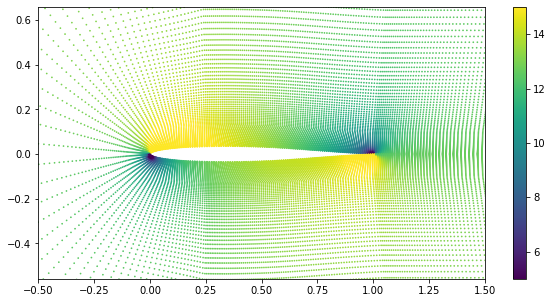

In [52]:
plt.rcParams["figure.figsize"] = [10,5]
plt.axis('equal')
plt.scatter(X[:,4],X[:,1],c=X[:,7],s=0.5)
plt.colorbar()
plt.clim(5, 15)
plt.xlim(-0.5,1.5)
plt.ylim(-0.1,0.2)

(-0.1, 0.2)

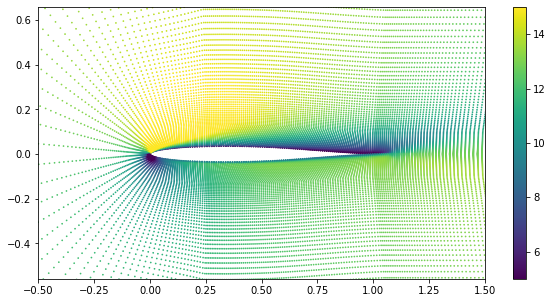

In [53]:
plt.rcParams["figure.figsize"] = [10,5]
plt.axis('equal')
plt.scatter(X[:,4],X[:,1],c=Y[:,8],s=0.5)
plt.colorbar()
plt.clim(5, 15)
plt.xlim(-0.5,1.5)
plt.ylim(-0.1,0.2)

(-0.1, 0.2)

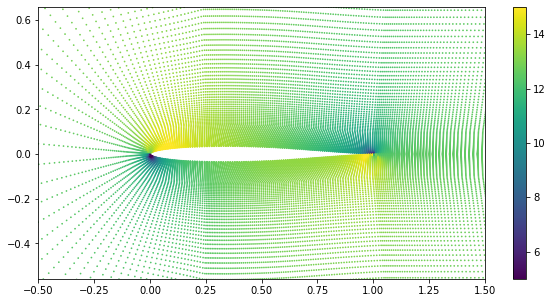

In [54]:
plt.rcParams["figure.figsize"] = [10,5]
plt.axis('equal')
plt.scatter(X[:,4],X[:,1],c=Yp[:,8],s=0.5)
plt.colorbar()
plt.clim(5, 15)
plt.xlim(-0.5,1.5)
plt.ylim(-0.1,0.2)